In [46]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Bidirectional, Embedding, GRU, Dense, LSTM, SimpleRNN
from sklearn.metrics import classification_report

In [47]:
max_features = 10000
maxlen = 500
batch_size = 128
epochs = 5
validation_split = 0.3

In [48]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [49]:
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# RNN:

In [50]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

In [51]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [52]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 322113 (1.23 MB)
Trainable params: 322113 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=validation_split)

Epoch 1/5
137/137 [==============================] - 26s 178ms/step - loss: 0.6648 - acc: 0.5915 - val_loss: 0.6036 - val_acc: 0.6900
Epoch 2/5
137/137 [==============================] - 24s 175ms/step - loss: 0.4507 - acc: 0.8015 - val_loss: 0.4123 - val_acc: 0.8263
Epoch 3/5
137/137 [==============================] - 25s 186ms/step - loss: 0.3278 - acc: 0.8673 - val_loss: 0.4105 - val_acc: 0.8188
Epoch 4/5
137/137 [==============================] - 25s 185ms/step - loss: 0.2468 - acc: 0.9058 - val_loss: 0.3789 - val_acc: 0.8413
Epoch 5/5
137/137 [==============================] - 23s 165ms/step - loss: 0.1820 - acc: 0.9314 - val_loss: 0.4403 - val_acc: 0.8093


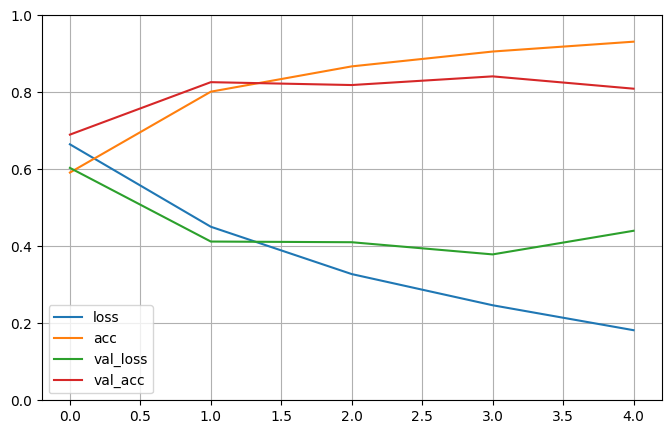

In [54]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [55]:
predictions = model.predict(x_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
    print(f"Predicted label: {binary_predictions[i]}, True label: {y_test[i]}")

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

report = classification_report(y_test, binary_predictions)
print(report)

782/782 [==============================] - 22s 28ms/step
Predicted label: 0, True label: 0
Predicted label: 1, True label: 1
Predicted label: 1, True label: 1
Predicted label: 0, True label: 0
Predicted label: 1, True label: 1
Predicted label: 0, True label: 1
Predicted label: 1, True label: 1
Predicted label: 0, True label: 0
Predicted label: 1, True label: 0
Predicted label: 1, True label: 1
782/782 [==============================] - 20s 26ms/step - loss: 0.4272 - acc: 0.8160
Test loss: 0.4272
Test accuracy: 0.8160
              precision    recall  f1-score   support

           0       0.81      0.82      0.82     12500
           1       0.82      0.81      0.82     12500

    accuracy                           0.82     25000
   macro avg       0.82      0.82      0.82     25000
weighted avg       0.82      0.82      0.82     25000



# LSTM:

In [56]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

In [57]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [58]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328353 (1.25 MB)
Trainable params: 328353 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [59]:
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=validation_split)

Epoch 1/5
137/137 [==============================] - 56s 392ms/step - loss: 0.6344 - acc: 0.6305 - val_loss: 0.4892 - val_acc: 0.7916
Epoch 2/5
137/137 [==============================] - 57s 415ms/step - loss: 0.3907 - acc: 0.8362 - val_loss: 0.3405 - val_acc: 0.8593
Epoch 3/5
137/137 [==============================] - 57s 418ms/step - loss: 0.2882 - acc: 0.8881 - val_loss: 0.3141 - val_acc: 0.8736
Epoch 4/5
137/137 [==============================] - 52s 380ms/step - loss: 0.2362 - acc: 0.9117 - val_loss: 0.2887 - val_acc: 0.8860
Epoch 5/5
137/137 [==============================] - 57s 412ms/step - loss: 0.2073 - acc: 0.9269 - val_loss: 0.3418 - val_acc: 0.8753


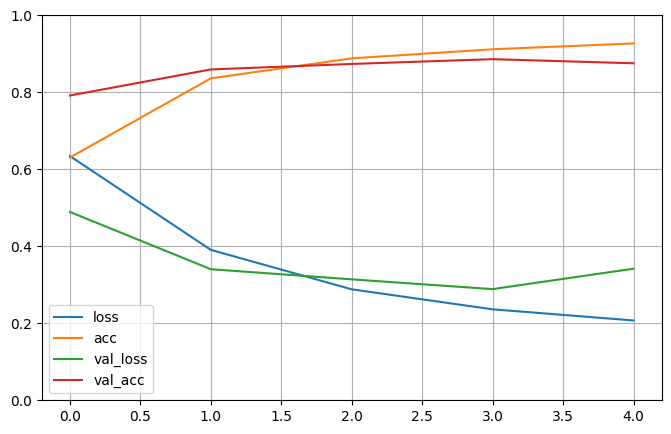

In [60]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [61]:
predictions = model.predict(x_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
    print(f"Predicted label: {binary_predictions[i]}, True label: {y_test[i]}")

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

report = classification_report(y_test, binary_predictions)
print(report)

782/782 [==============================] - 39s 50ms/step
Predicted label: 0, True label: 0
Predicted label: 1, True label: 1
Predicted label: 1, True label: 1
Predicted label: 0, True label: 0
Predicted label: 1, True label: 1
Predicted label: 1, True label: 1
Predicted label: 1, True label: 1
Predicted label: 0, True label: 0
Predicted label: 1, True label: 0
Predicted label: 1, True label: 1
782/782 [==============================] - 37s 47ms/step - loss: 0.3609 - acc: 0.8656
Test loss: 0.3609
Test accuracy: 0.8656
              precision    recall  f1-score   support

           0       0.92      0.80      0.86     12500
           1       0.82      0.93      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000



# BRNN:

In [62]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

In [63]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [64]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 32)          320000    
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 336705 (1.28 MB)
Trainable params: 336705 (1.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [65]:
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=validation_split)

Epoch 1/5
137/137 [==============================] - 97s 685ms/step - loss: 0.6499 - acc: 0.6063 - val_loss: 0.5349 - val_acc: 0.7865
Epoch 2/5
137/137 [==============================] - 91s 662ms/step - loss: 0.4138 - acc: 0.8267 - val_loss: 0.3364 - val_acc: 0.8645
Epoch 3/5
137/137 [==============================] - 91s 667ms/step - loss: 0.3080 - acc: 0.8773 - val_loss: 0.3175 - val_acc: 0.8753
Epoch 4/5
137/137 [==============================] - 90s 658ms/step - loss: 0.2500 - acc: 0.9031 - val_loss: 0.3120 - val_acc: 0.8657
Epoch 5/5
137/137 [==============================] - 90s 660ms/step - loss: 0.2155 - acc: 0.9209 - val_loss: 0.3173 - val_acc: 0.8765


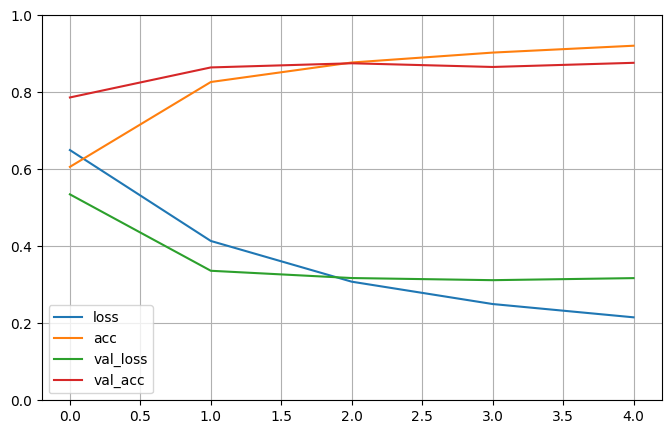

In [66]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [67]:
predictions = model.predict(x_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
    print(f"Predicted label: {binary_predictions[i]}, True label: {y_test[i]}")

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

report = classification_report(y_test, binary_predictions)
print(report)

782/782 [==============================] - 59s 75ms/step
Predicted label: 0, True label: 0
Predicted label: 1, True label: 1
Predicted label: 0, True label: 1
Predicted label: 0, True label: 0
Predicted label: 1, True label: 1
Predicted label: 1, True label: 1
Predicted label: 1, True label: 1
Predicted label: 0, True label: 0
Predicted label: 1, True label: 0
Predicted label: 1, True label: 1
782/782 [==============================] - 60s 77ms/step - loss: 0.3320 - acc: 0.8692
Test loss: 0.3320
Test accuracy: 0.8692
              precision    recall  f1-score   support

           0       0.84      0.92      0.88     12500
           1       0.91      0.82      0.86     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000



# DRNN:

In [68]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

In [69]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [70]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm_3 (LSTM)               (None, None, 32)          8320      
                                                                 
 lstm_4 (LSTM)               (None, 32)                8320      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 336673 (1.28 MB)
Trainable params: 336673 (1.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [71]:
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=validation_split)

Epoch 1/5
137/137 [==============================] - 119s 842ms/step - loss: 0.6218 - acc: 0.6294 - val_loss: 0.4257 - val_acc: 0.8080
Epoch 2/5
137/137 [==============================] - 115s 838ms/step - loss: 0.3716 - acc: 0.8437 - val_loss: 0.3131 - val_acc: 0.8713
Epoch 3/5
137/137 [==============================] - 114s 837ms/step - loss: 0.2826 - acc: 0.8872 - val_loss: 0.3161 - val_acc: 0.8669
Epoch 4/5
137/137 [==============================] - 120s 878ms/step - loss: 0.2303 - acc: 0.9121 - val_loss: 0.2996 - val_acc: 0.8747
Epoch 5/5
137/137 [==============================] - 115s 842ms/step - loss: 0.1991 - acc: 0.9273 - val_loss: 0.3295 - val_acc: 0.8772


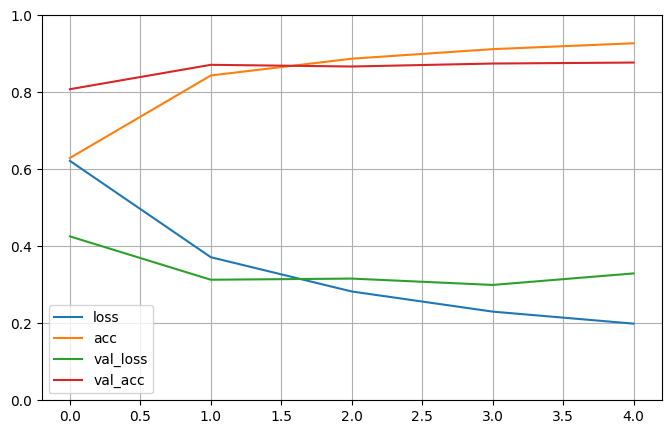

In [72]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [73]:
predictions = model.predict(x_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
    print(f"Predicted label: {binary_predictions[i]}, True label: {y_test[i]}")

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

report = classification_report(y_test, binary_predictions)
print(report)

782/782 [==============================] - 82s 104ms/step
Predicted label: 0, True label: 0
Predicted label: 1, True label: 1
Predicted label: 1, True label: 1
Predicted label: 1, True label: 0
Predicted label: 1, True label: 1
Predicted label: 1, True label: 1
Predicted label: 1, True label: 1
Predicted label: 0, True label: 0
Predicted label: 1, True label: 0
Predicted label: 1, True label: 1
782/782 [==============================] - 81s 104ms/step - loss: 0.3472 - acc: 0.8706
Test loss: 0.3472
Test accuracy: 0.8706
              precision    recall  f1-score   support

           0       0.91      0.83      0.86     12500
           1       0.84      0.91      0.88     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000



**Результати випробувань:**

RNN: Test Loss: 0.4272 Test Accuracy: 0.8160

LSTM: Test Loss: 0.3609 Test Accuracy: 0.8656

BRNN: Test Loss: 0.3320 Test Accuracy: 0.8692

DRNN: Test Loss: 0.3472 Test Accuracy: 0.8706

Всі використані рекурентні нейронні мережі показали досить високий та відносно рівний результат. Найбільшу точність показала глибока двустороння рекурентна нейронна мережа(DRNN).